# Import Necessary Libraries

In [1]:
import random
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import time
import csv
import os

# Phase 1 - Fill Arrays with Random Values 
* Objective
* * Create arrays of randoms values with sizes: 100, 1000, 10000, & 100000
  * The arrays will be used as test cases for each sorting algorithm

In [2]:
# Function to arrays of various size with random integers
def generate_random_array(size: int) -> list[int]:
    try:
        if size <= 0:
            raise ValueError("Array size must be a positive integer.")
        return [random.randint(1, 100000) for _ in range(size)]
    except Exception as e:
        print(f"Error generating random array: {e}")
        return []

# Visual Display of Array Size (100, ) being generated
* Generate and Display Array of Size 100: This button, when clicked, generates an array of 100 random integers and displays it. Each time the button is clicked, it clears the previous output and generates a new array.

In [3]:
# Create interactive button with label
generate_button = widgets.Button(description='Generate and Display Array of Size 100')
# Initial Output Widget
output = widgets.Output()

# Function to generate Array Size (100, ) when button is clicked
# clears output each time button is reclicked
def on_generate_button_clicked(b):
    output.clear_output()
    with output:
        try:
            print('Array of 100 elements:', generate_random_array(100))
        except Exception as e:
            print(f"Error generating array: {e}") 

# Register on_generate_button_clicked as event handler for generate button
generate_button.on_click(on_generate_button_clicked)
# Display generate_button and output widget
display(generate_button, output)

Button(description='Generate and Display Array of Size 100', style=ButtonStyle())

Output()

# Interactive generation of random array, sorting, and testing
* Input Field: The user can enter the desired array size
* Button: Triggers the generation of the random array and sorting
* Output Display: Display the unsorted and sorted arrays.

In [4]:
# Input widget for array size
array_size_input = widgets.IntText(
    value=100, description='Array Size:', style={'description_width': 'initiail'})

In [5]:
# Buttons to generate and sort the array
generate_quicksort_button = widgets.Button(description='Generate & Sort Array with QuickSort')
generate_mergesort_button = widgets.Button(description='Generate & Sort Array with MergeSort')
output = widgets.Output()

**Logging of Test Results to CSV Files**

In [6]:
# Defirne the log file path
log_file_path = 'sorting_results_v1.csv'
# Check if log file exists - if not, create it with headers
try:
    if not os.path.exists(log_file_path):
        with open(log_file_path, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Array Size', 'Sorting Algorithm', 'Time Taken (seconds)'])
except Exception as e:
    print(f"Error initializing log file: {e}")

In [7]:
# Function to log results to a CSV file
def log_result(array_size, algorithm_name, time_taken):
    try:
        with open(log_file_path, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([array_size, algorithm_name, time_taken])
    except Exception as e:
        print(f"Error logging result: {e}")

# Phase 2 - Implementing Sorting Algorithms
* Objective
* * Implement two industry standard sorting algorithms: **Quicksort** and **MergeSort**
  *  *Quicksort* - Reference: [Hugocsr. (2016, August 12). quicksort-python/quicksort.py [Source code]. GitHub.](https://github.com/Hugocsr/quicksort-python)
  *   *Mergesort* - Reference: [Alperyalman. (2022, November). python-mergeSort/mergeSort.py [Source code]. GitHub.](https://github.com/alperyalman/python-mergeSort)

In [8]:
# My version of Quicksort source code
# Function for Quicksork
def qsort(arr: list[int]) -> list[int]:
    try:
        if not isinstance(arr, list):
            raise TypeError("Input must be a list.")
        # Base Case: 0 or 1 elements - array is already sorted
        if len(arr) <= 1:
            return arr
    
        #Initialize lists to hold elements smaller than, equal to, and larger than the pivot
        smaller, equal, larger = [], [], []
        pivot = arr[0]
        
        # Segement the list into smaller, equal, and larger lists based on pivot
        for item in arr:
            if item < pivot:
                smaller.append(item)
            elif item == pivot:
                equal.append(item)
            else:
                larger.append(item)
        # Recursively sort the smaller and larger lists, then combine them with the equal list
        return qsort(smaller) + equal + qsort(larger)
    except Exception as e:
        print(f'Error in QuickSort: {e}')
        return []

***The above script define a recursive quicksort function.*** 

***It partitions the list around a pivot element and sorts each partition recursively, combining the results to produce a sorted list.***

In [9]:
# My version of Mergesort source code
def mergesort(arr: list[int]) -> list[int]:
    try:
        if not isinstance(arr, list):
            raise TypeError("Input must be a list.")
        if len(arr) > 1:
            # If array has more the one element, proceed with splitting and merging
            mid = len(arr) // 2
            left = arr[:mid]
            right = arr[mid:]
    
            # Recursively sort each half
            mergesort(left)
            mergesort(right)
    
            # Initialize pointers for left half (i), right half (j), and main array (k)
            i = j = k = 0
    
            # Merge the sorted havles back into the main array
            while i < len(left) and j < len(right):
                if left[i] <= right[j]:
                    arr[k] = left[i]
                    i += 1
                else:
                    arr[k] = right[j]
                    j += 1
                k += 1
    
            # Copy any remaining elements from left half, if any remain
            while i < len(left):
                arr[k] = left[i]
                i += 1
                k += 1
    
            # Copy any remaining element from right half, if any remain
            while j < len(right):
                arr[k] = right[j]
                j += 1
                k += 1
    
        # Return sorted array
        return arr
    except Exception as e:
        print(f'Error in MergeSort: {e}')
        return []

# Phase 3 - Create Interactive Buttons 
* Generate & Sort Array with QuickSort: This button generates an array of the specified size (based on user input) and sorts it using QuickSort. The unsorted and sorted arrays are displayed along with the time taken for sorting. The sorting time is also logged to a CSV file.
* Generate & Sort Array with MergeSort: Similar to the QuickSort button, this button generates an array of the specified size, sorts it using MergeSort, and displays the unsorted and sorted arrays along with the time taken. The sorting time is recorded in a CSV file for performance tracking.

In [10]:
# Function to handle Quicksort button click
def on_generate_quicksort_button_clicked(b):
    output.clear_output()
    with output:
        try:
            # Get array size from input
            array_size = array_size_input.value
            # Validate user input
            if array_size <= 0:
                raise ValueError('Array size must be poisitive.')
            # Generate random array
            random_array = generate_random_array(array_size)
            # If array fails to generate
            if not random_array:
                raise RuntimeError('Failed to generate random array.')
    
            # Measure sorting time
            start_time = time.time()
            sorted_array = qsort(random_array)
            time_taken = time.time() - start_time
    
            # Log the result to CSV file
            log_result(array_size, 'QuickSort', time_taken)       
           
            # Display the results
            print(f'Unsorted Array of {array_size} elements:', random_array)
            print(f'Sorted Array of {array_size} elements:', sorted_array)
            print(f'Time taken to sort with QuickSort: {time_taken:.4f} seconds')
        except Exception as e:
            print(f'Error during QuickSort operation: {e}')

# Function to handle Mergesort button click
def on_generate_mergesort_button_clicked(b):
    output.clear_output()
    with output:
        try:
            # Get array size from input
            array_size = array_size_input.value
            # Validate user input
            if array_size <= 0:
                raise ValueError('Array size must be positive.')
            # Generate random array
            random_array = generate_random_array(array_size)
            # If array fails to generate
            if not random_array:
                raise RuntimeError('Failed to generate random array.')
    
            # Measure sorting time
            start_time = time.time()
            sorted_array = mergesort(random_array.copy())
            time_taken = time.time() - start_time
    
            # Log the result to CSV file
            log_result(array_size, 'MergeSort', time_taken)       
           
            # Display the results
            print(f'Unsorted Array of {array_size} elements:', random_array)
            print(f'Sorted Array of {array_size} elements:', sorted_array)
            print(f'Time taken to sort with MergeSort: {time_taken:.4f} seconds')
        except Exception as e:
            print(f'Error during MergeSort operation: {e}')

# line button to function
generate_quicksort_button.on_click(on_generate_quicksort_button_clicked)
generate_mergesort_button.on_click(on_generate_mergesort_button_clicked)

# Display widgets
display(array_size_input, generate_quicksort_button, generate_mergesort_button, output)

IntText(value=100, description='Array Size:', style=DescriptionStyle(description_width='initiail'))

Button(description='Generate & Sort Array with QuickSort', style=ButtonStyle())

Button(description='Generate & Sort Array with MergeSort', style=ButtonStyle())

Output()

# Phase 4 - Performance Analysis and Data Visualization
* Objective
* * Load the performance data from the sorting_results.csv
  * Visualize runtime performance for different arrays sizes and sorting algorithms
  * Analyze trends and compare QuickSort and MergeSort performance

Performance Data:
   Array Size Sorting Algorithm  Time Taken (seconds)
0         100         QuickSort              0.000000
1         100         MergeSort              0.000000
2        1000         QuickSort              0.000000
3        1000         MergeSort              0.001020
4       10000         QuickSort              0.008504
5       10000         MergeSort              0.015268
6      100000         QuickSort              0.088347
7      100000         MergeSort              0.187444


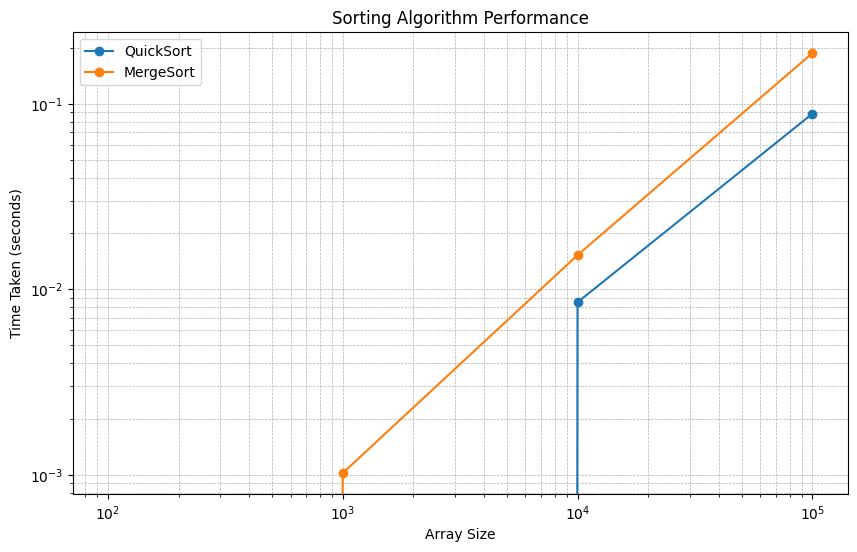

In [11]:
# Load performance data from CSV
try: 
    # If log file of data exists
    if os.path.exists(log_file_path):
        # Load performance data
        performance_data = pd.read_csv(log_file_path)
        # Display Performance Data
        print('Performance Data:')
        print(performance_data)
        # Group data by algorithms and size for visualization
        grouped_data = performance_data.groupby(['Array Size', 'Sorting Algorithm']).mean().reset_index()
        # Plot Performance Trends
        plt.figure(figsize=(10, 6))
        
        # Plot Quicksort data
        qs_data = grouped_data[grouped_data['Sorting Algorithm'] == 'QuickSort']
        plt.plot(qs_data['Array Size'], qs_data['Time Taken (seconds)'], marker='o', label='QuickSort')
        
        # Plot Mergesort data
        ms_data = grouped_data[grouped_data['Sorting Algorithm'] == 'MergeSort']
        plt.plot(ms_data['Array Size'], ms_data['Time Taken (seconds)'], marker='o', label='MergeSort')
        
        # Custom Plot
        plt.title('Sorting Algorithm Performance')
        plt.xlabel('Array Size')
        plt.ylabel('Time Taken (seconds)')
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Show plot
        plt.show()
    else:
        print("Log file not found. Skipping performance data plotting.")
except Exception as e:
    print(f"Error loading or plotting performance data: {e}")

# Phase 5 - Conclusion

## What are the differences in performance?
* * The data and chart illustrate that QuickSort consistently outperforms MergeSort across various array sizes, especially as the array size increases.
  * QuickSort’s runtime grows more gradually than MergeSort’s, indicating that QuickSort generally handles larger datasets more efficiently in terms of execution time.
  * For smaller arrays (e.g., 100 and 1,000 elements), the performance difference between QuickSort and MergeSort is minimal. However, as the array size increases to 10,000 elements and beyond, QuickSort demonstrates a noticeably faster performance.

## Why do these differences exist?
* * The performance differences between QuickSort and MergeSort stem from several algorithmic factors:
  * Recursion Depth:
  *  * QuickSort has a generally lower recursion depth than MergeSort due to its divide-and-conquer approach that selects a pivot and partitions the array around it.
  * When implemented well, QuickSort can have a time complexity of 𝑂(𝑛log𝑛) in average cases, with less overhead from recursive calls than MergeSort.
  * Merge Overhead:
  *  * MergeSort involves merging two sorted halves, which requires additional memory and computational overhead.
     * This overhead becomes more pronounced as array sizes increase, resulting in a higher constant factor in MergeSort's time complexity.
     * While both algorithms have an average-case time complexity of 𝑂(𝑛log𝑛), MergeSort's merging phase adds to its execution time, making it slower in practice for many typical datasets.

## In what scenarios is one algorithm preferable over the other?
* * QuickSort:
  * * QuickSort is generally preferable for in-place sorting when memory usage is a concern, as it does not require additional storage for merging, unlike MergeSort.
  * * It is also well-suited for datasets that can be effectively partitioned with a good pivot selection, making it efficient for most general-purpose sorting tasks.
* * MergeSort:
  * * MergeSort is preferable in scenarios where stability is crucial (i.e., maintaining the relative order of equal elements), as it is a stable sorting algorithm, whereas QuickSort is not inherently stable.
    * MergeSort is also optimal for linked lists or large datasets that do not fit entirely in memory, as it can handle external sorting more efficiently by merging sorted chunks.
  * Reference
  * [Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to algorithms (3rd ed.). MIT Press. Retrieved from](https://archive.org/details/introduction-to-algorithms-third-edition-2009)